# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
#Somehow in my environment, I am facing issues related to ipywidgets
#Also facing issues while enabling GPU. I am checking with the forum.
#Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_addmm)
#Disabled GPU for this project
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('ipywidgets')

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import ipywidgets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [8]:
# Define transforms
transform = transforms.ToTensor()
#I also learnt that using compose we can supply tranforms as a list.

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="data", 
                           train=True, 
                           download=True,
                           transform=transform)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=28, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", 
                           train=False, 
                           download=True,
                           transform=transform)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=28, shuffle=False)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Preprocessing is required incase if we want to convert raw data to tensors, so that it will be conducive to use by neural network. In our case with MNIST dataset, with ToTensor() we can convert to tensors. This MNIST dataset is coming as (C,W,H) 1,28,28. I dont see a need to encode any non numerical or convert images or tokenize any info with this dataset.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [9]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
5


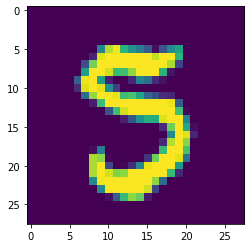

6


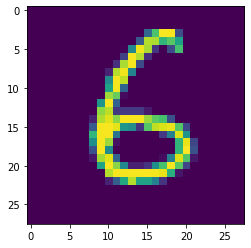

5


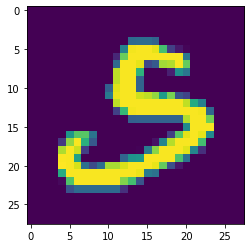

8


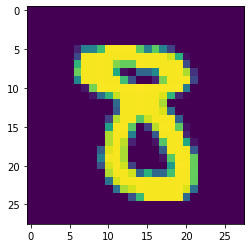

5


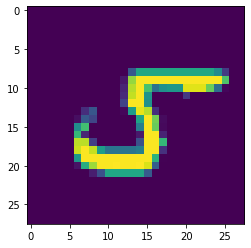

In [10]:
# Explore data
print(training_data)
#print(training_data[0][0].shape)

#training_flatten = torch.flatten(training_data[0][0])
#print(training_flatten.shape)

show5(train_dataloader)
#show5(test_dataloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [11]:
## Build Neuralnet ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.softmax = F.softmax
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [12]:
# Optimizer
# I found that Adam is mostly used in vision tasks, I also tried with SGD
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [14]:
# Train the network here, I kept this simple
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in train_dataloader:
        log_ps = net(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: 443.1199025341775
Training loss: 177.29163651616545
Training loss: 120.94573567672342
Training loss: 93.70957139382517
Training loss: 69.81073642316733
Training loss: 58.082364604951636
Training loss: 54.389414770092344
Training loss: 43.32837001721708
Training loss: 40.561123063289244
Training loss: 38.60486892834976


Plot the training loss (and validation loss/accuracy, if recorded).

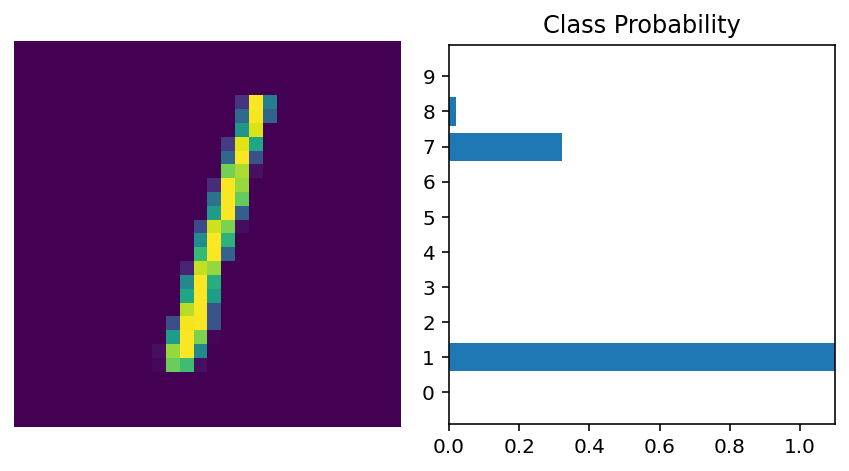

In [21]:
# Test out the network!
dataiter = iter(test_dataloader)
images, labels = dataiter.next()
img = images[2]

ps = torch.exp(net(img))

# Plot the image and probabilities
ps = ps.data.numpy().squeeze()

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))

ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [22]:
# Initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
batch_size = 4

net.eval() # prepare the model for evaluation

for data, target in test_dataloader:
    # forward pass
    output = net(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.104777

Test Accuracy of     0: 98% (143/145)
Test Accuracy of     1: 99% (155/156)
Test Accuracy of     2: 98% (142/144)
Test Accuracy of     3: 97% (147/151)
Test Accuracy of     4: 95% (138/144)
Test Accuracy of     5: 96% (125/130)
Test Accuracy of     6: 99% (125/126)
Test Accuracy of     7: 96% (153/158)
Test Accuracy of     8: 97% (132/135)
Test Accuracy of     9: 95% (137/143)

Test Accuracy (Overall): 97% (1397/1432)


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [25]:
## Hyperparam tuning , set lr =0.01 and optim as SGD, set epochs to 12
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Loss function
criterion = nn.CrossEntropyLoss()

# NN
epochs = 12

for e in range(epochs):
    running_loss = 0
    for images, labels in train_dataloader:
        log_ps = net(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")
        

# Test Model
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
batch_size = 4

net.eval() # prep model for evaluation

for data, target in test_dataloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = net(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Training loss: 16.587318220477215
Training loss: 9.148390000047296
Training loss: 6.675381346997021
Training loss: 5.293550273654549
Training loss: 4.4042058584809425
Training loss: 3.802983962493105
Training loss: 3.377212751050404
Training loss: 3.0419564672259867
Training loss: 2.7907089010887756
Training loss: 2.573073879322731
Training loss: 2.3889881419145773
Training loss: 2.234232392116983
Test Loss: 0.080865

Test Accuracy of     0: 98% (143/145)
Test Accuracy of     1: 99% (155/156)
Test Accuracy of     2: 99% (143/144)
Test Accuracy of     3: 96% (146/151)
Test Accuracy of     4: 97% (140/144)
Test Accuracy of     5: 98% (128/130)
Test Accuracy of     6: 98% (124/126)
Test Accuracy of     7: 97% (154/158)
Test Accuracy of     8: 98% (133/135)
Test Accuracy of     9: 97% (139/143)

Test Accuracy (Overall): 98% (1405/1432)


## Saving your model
Using `torch.save`, save your model for future loading.

In [24]:
## YOUR CODE HERE ##
torch.save(net,'mnistmodel.pt')